# Principal Component Analysis (PCA)

PCA is an unsupervised technique that processes unlabelled data to restructure the columns of a dataframe. The primary use of PCA is dimensionality reduction, which reduces the number of columns without losing significant information. This streamlining of data has a notable secondary effect: it reduces noise. Noise in data refers to random variations or errors that obscure underlying patterns or signals, making it harder to extract meaningful information.

In this project, we don't have many columns, so dimensionality reduction isn't a major concern. However, this technique will be particularly useful in our next project, supervised machine learning. For now, you'll find that the noise reduction achieved through PCA helps to create better clusters, demonstrating why PCA is such a valuable unsupervised learning tool.

## 1.&nbsp; Import libraries and files 💾

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
# Get the spreadsheet ID and name
sheet_id = "1gYXqOBLEYIr99YmKGq2nIvK3CJmoWzsvwfwR9adfo2w"
sheet_name = "18136796"

# Construct the URL to the CSV export of the spreadsheet
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Read the CSV data into a Pandas DataFrame
# Set the index column to `student` and only read the first 15 rows
foods_df = pd.read_csv(url,
                       index_col="student")

# Drop the `favorite_color` column
foods_df = foods_df.drop(columns="favorite_color")

## 2.&nbsp; Scale the data 📐
In this notebook, we are only using the MinMaxScaler to keep the code simple and focus on PCA. However, we encourage you to experiment with other scalers, as they can have a impact.

In [3]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(foods_df)

## 3.&nbsp; PCA ⚙️
As you saw on the LMS, PCA creates as many principal components as the original DataFrame has columns. We then need to decide how many of these components to keep. Before we do that, let's look at how PCA transforms our DataFrame.

In [ ]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_features_df)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(scaled_features_df)

pca_basic_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
student,,,,,,,,,,
Alexandra,-0.791544,0.013019,1.141658,-0.035853,-0.155952,0.101268,0.067188,0.075349,-0.018000,-0.049562
Andrea,0.049550,-0.820885,0.353933,-0.542393,0.377203,-0.130496,0.073656,0.043619,-0.023637,0.057998
Daniel,-0.686774,-0.839755,-0.352403,0.423750,-0.061842,0.240311,-0.319581,0.086818,0.034673,0.002020
Josef,-0.627075,0.944560,-0.037933,0.257967,0.107956,-0.192858,-0.199884,0.017786,-0.012187,0.026773
Kaj,-1.005751,0.087092,-0.307003,-0.411140,-0.324927,-0.174651,0.019193,-0.199877,-0.072476,0.014589
Katherine,-0.369758,0.440530,-0.342519,-0.127094,0.528051,0.459197,0.173156,-0.081689,0.026757,-0.010779
Leslie,0.340745,0.239646,0.294414,0.069526,-0.068146,-0.179807,0.015188,-0.037138,0.197685,0.020505
Merry,0.742523,-0.417591,-0.151973,-0.136223,-0.010156,-0.100662,-0.080915,-0.257022,0.021292,-0.056007
Perry,1.035180,0.144931,0.214252,0.283412,-0.436968,0.365140,0.057370,-0.062502,-0.053461,0.047467


> You may notice that we have the same amount of columns as before but we have lost the column names. This is because the columns are now principal components and not the original features (danceability, speechiness, etc...). Principal components are an abstraction of the original features, capturing the most significant patterns and trends within the data. They are like new axes along which the data is spread out, representing directions of maximum variance. The first principal component explains the largest amount of variance, followed by the second, and so on.

### 3.1.&nbsp; Identifying the most informative principal components
Principal component analysis (PCA) assumes that variance is information. This means that PCA believes that the directions in which the data varies the most are the most important.

When we fit PCA to our data, it calculates all of the principal components. We can see how much variance each principal component explains using the `explained_variance_ratio_` attribute.
> The principal components are ranked in order of decreasing variance, with the first principal component explaining the most variance in the data

In [5]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.36750845, 0.19249008, 0.15946553, 0.13408911, 0.06318577,
       0.04111646, 0.02307594, 0.0141886 , 0.00398162, 0.00089843])

To determine how many principal components to keep, we can use one of two methods:

- **Elbow method**: This is a more manual approach where we plot the explained variance of each principal component against its index. The elbow point is the point at which the explained variance starts to drop off significantly. This is the point at which it is no longer worth retaining any more principal components, as they are not explaining much additional variance.
- **Cumulative explained variance**: This is a more automated approach where SKLearn calculates how many principal components contain a given amount of variance, such as 95%.

#### 3.1.1.&nbsp; Elbow method
The elbow method works by plotting the variance of each principal component against its index.

In [6]:
pd.DataFrame(explained_variance_array, columns=["Variance explained"])

,Variance explained
0,0.367508
1,0.192490
2,0.159466
3,0.134089
4,0.063186
5,0.041116
6,0.023076
7,0.014189
8,0.003982
9,0.000898


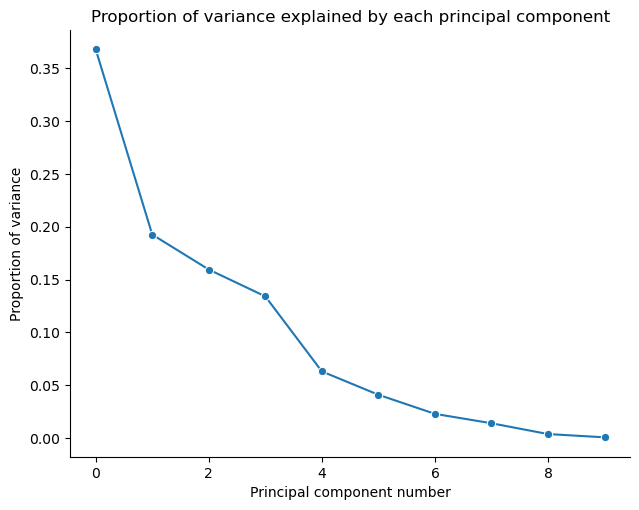

In [7]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

Just like the elbow method used to determine the optimal number of clusters for k-means clustering, we are looking for a point where the decrease in variance levels off. This point, known as the elbow point, marks the point at which the explained variance starts to reduce significantly.

In [8]:
# Set the variable elbow to where you believe the elbow is
elbow = 6

Let's make a DataFrame containing these principle components

In [9]:
# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components = elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
student,,,,,,,
Alexandra,-0.791544,0.013019,1.141658,-0.035853,-0.155952,0.101268,0.067188
Andrea,0.049550,-0.820885,0.353933,-0.542393,0.377203,-0.130496,0.073656
Daniel,-0.686774,-0.839755,-0.352403,0.423750,-0.061842,0.240311,-0.319581
Josef,-0.627075,0.944560,-0.037933,0.257967,0.107956,-0.192858,-0.199884
Kaj,-1.005751,0.087092,-0.307003,-0.411140,-0.324927,-0.174651,0.019193
Katherine,-0.369758,0.440530,-0.342519,-0.127094,0.528051,0.459197,0.173156
Leslie,0.340745,0.239646,0.294414,0.069526,-0.068146,-0.179807,0.015188
Merry,0.742523,-0.417591,-0.151973,-0.136223,-0.010156,-0.100662,-0.080915
Perry,1.035180,0.144931,0.214252,0.283412,-0.436968,0.365140,0.057370


#### 3.1.2.&nbsp; Cumulative explained variance
Cumulative explained variance (CEV) is calculated by summing the explained variance of each principal component. The CEV plot shows how much variance is explained by each principal component, as well as the cumulative variance explained by all principal components up to that point.

In [10]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.36750845, 0.55999854, 0.71946406, 0.85355318, 0.91673895,
       0.95785541, 0.98093135, 0.99511995, 0.99910157, 1.        ])

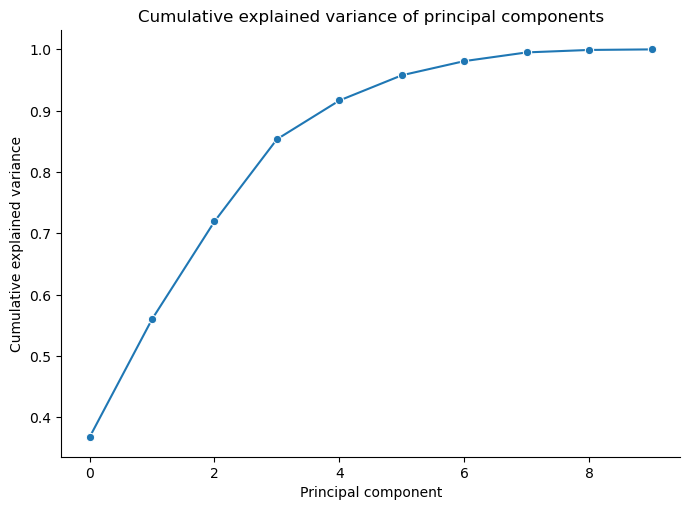

In [11]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

We can also look for an elbow in the cumulative variance plot to determine how many principal components to retain. However, instead of doing that, we will set a cumulative variance threshold in the PCA constructor. This threshold tells scikit-learn how many principal components to retain. For example, 0.95 tells scikit-learn that we want to retain as many principle components as contain 95% or more of the variance.

In [12]:
# Create a PCA object
pca_variance = PCA(n_components = 0.95)

Let's visualise this threshold

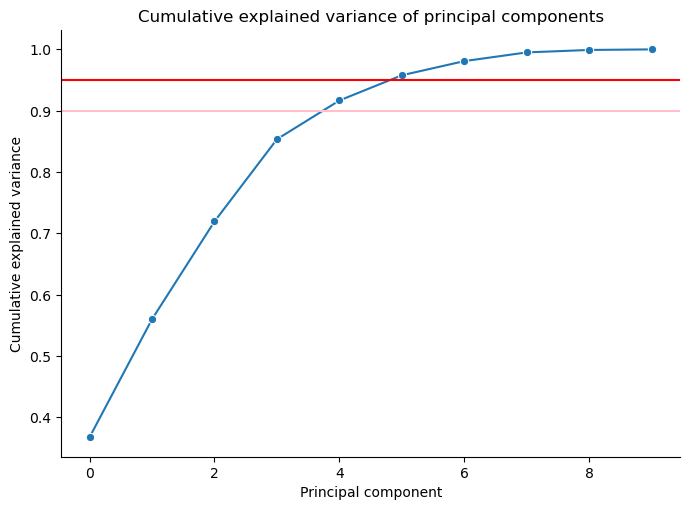

In [13]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95, color = 'red');
plt.axhline(y = 0.90, color = 'pink');

Let's apply this to our scaled data

In [14]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,pca0,pca1,pca2,pca3,pca4,pca5
student,,,,,,
Alexandra,-0.791544,0.013019,1.141658,-0.035853,-0.155952,0.101268
Andrea,0.049550,-0.820885,0.353933,-0.542393,0.377203,-0.130496
Daniel,-0.686774,-0.839755,-0.352403,0.423750,-0.061842,0.240311
Josef,-0.627075,0.944560,-0.037933,0.257967,0.107956,-0.192858
Kaj,-1.005751,0.087092,-0.307003,-0.411140,-0.324927,-0.174651
Katherine,-0.369758,0.440530,-0.342519,-0.127094,0.528051,0.459197
Leslie,0.340745,0.239646,0.294414,0.069526,-0.068146,-0.179807
Merry,0.742523,-0.417591,-0.151973,-0.136223,-0.010156,-0.100662
Perry,1.035180,0.144931,0.214252,0.283412,-0.436968,0.365140


### 3.2.&nbsp; Using PCA on a bigger dataset
Let's look at how useful PCA can be as your datasets get bigger

Sklearn `make_blobs` creates artificial datasets with distinct clusters. Specifically, it creates a specified number of clusters, each with a defined center and standard deviation, and generates a set of random data points around these cluster centers.

In [15]:
X, _ = make_blobs(n_samples = 1000,
                  n_features = 80,
                  centers = 30,
                  random_state = 123)

blobs_df = pd.DataFrame(X)

blobs_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-1.701211,-6.399239,-7.729052,2.265238,8.432041,9.277738,-3.215520,8.544695,6.099043,0.014891,...,9.396956,5.661922,2.934566,3.170368,-7.399278,-0.832894,-0.999056,-8.342735,-10.092994,-10.179048
1,6.278723,-1.685660,-8.218419,1.232155,4.975136,3.283750,-7.377526,-2.714595,-3.882671,-1.899557,...,5.466632,2.652671,-9.222847,9.538737,-7.463871,2.315972,-2.579873,8.930986,9.458209,-4.704239
2,0.362480,6.060881,8.326247,-8.100459,3.719719,5.852855,-3.622466,10.132258,-4.990926,-10.128942,...,-4.794613,-5.285732,2.524211,-0.303708,-3.738831,-8.620748,0.995726,-3.263961,-1.606649,-2.287265
3,-7.898993,7.340964,8.437767,1.638283,-10.638737,-5.494111,4.355004,6.773989,-1.184502,-2.607903,...,0.693676,2.874440,4.808158,-6.888949,7.978908,1.088713,-8.015163,3.873678,-6.091533,-9.308514
4,-1.966892,4.560141,0.305921,-9.505989,2.049690,4.833094,-3.366090,6.964881,6.073835,-0.826616,...,-6.015234,-5.711455,-4.577501,6.368909,7.408595,-10.217053,-3.956262,9.250847,0.802116,3.455974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.037868,-1.052171,-1.696614,-3.589264,1.354960,-7.171995,-6.449717,7.796660,-7.974470,9.057194,...,0.628226,8.164277,0.225216,5.006440,-8.500344,8.669795,9.208054,-4.265727,5.286935,4.811373
996,4.966277,-1.962102,-0.405020,-5.171068,1.487542,-8.193387,-5.577824,6.705522,-9.944412,7.558356,...,3.103869,9.523761,-1.618870,5.583400,-11.195325,7.614480,8.127628,-4.248268,4.068702,7.036022
997,3.113358,-6.218700,-7.158985,3.228768,3.312216,-0.032758,8.548647,4.993490,0.905350,-1.923980,...,-7.073941,8.812679,3.583802,5.988114,-8.865571,-0.392879,1.778686,-6.369937,-7.159916,2.437978
998,-3.098527,0.416230,-9.574874,6.547465,8.146674,0.221676,-4.811377,8.627207,-2.746769,2.801459,...,-7.886887,2.117376,-0.069422,-7.265878,-9.514596,-1.640425,2.925496,-2.944405,-2.298123,6.162888


Scale our created data

In [16]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_blobs_df = my_min_max.fit_transform(blobs_df)

Perform PCA on our scaled data

In [17]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_blobs_df)

PCA()

Extract the explained variance for each Principal Component

In [18]:
explained_blobs_variance_array = pca.explained_variance_ratio_

Plot the cumulative sum of the extracted variances

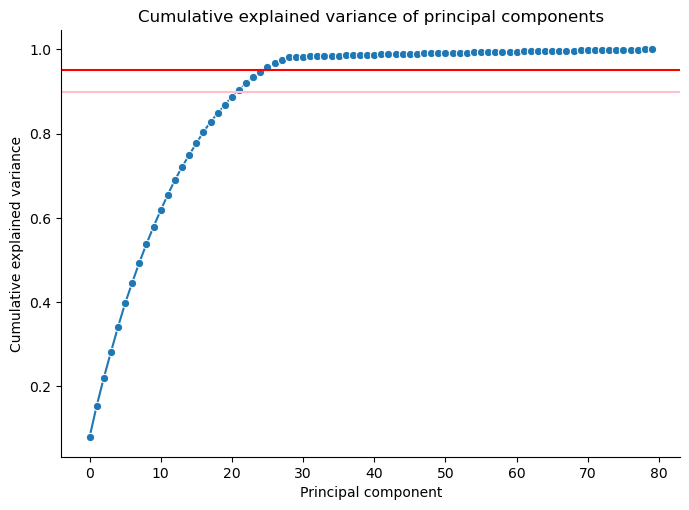

In [19]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_blobs_variance_array)),  # Set the x-axis to be the principal component index
      y = np.cumsum(explained_blobs_variance_array),  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95, color = 'red');
plt.axhline(y = 0.90, color = 'pink');

Find out how many components make up 95% of the variance

In [20]:
# Calculate the cumulative sum
cumulative_sum = np.cumsum(explained_blobs_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

26


In this example, we were able to successfully reduce an 80-dimensional dataset to a more manageable 26-dimensional representation. This significant reduction in dimensionality not only helps to minimize noise but also substantially improves training times.

## 4.&nbsp; Challenge: apply this to the spotify dataset 😃
Use PCA to reduce noise and the dimensionality of the Spotify dataset before clustering the songs. This will help to identify the most important features of the songs, and it will also make the clustering process more efficient.

Once you have clustered the songs using the selected principal components, you can analyse the clusters to identify groups of similar songs. For example, you could look for clusters of songs with similar genres, tempos, or moods.

## 4.1 Data

Libraries

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly
import plotly.graph_objects as go
import random
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

from ydata_profiling import ProfileReport

Data

In [276]:
file_id = "12RcGLcvv-UjJjb3wL_yL76EiPT2JvB3k" # milos
url = f'https://drive.google.com/uc?export=download&id={file_id}'
songs5000_df = pd.read_csv(url, index_col='id                     ')
songs5000_df.columns = songs5000_df.columns.str.strip()
songs5000_df = songs5000_df[~songs5000_df.index.duplicated(keep='first')]
songs5000_names_df = songs5000_df[['name', 'artist', 'html']]
to_drop = ['Unnamed: 0', 'name', 'artist', 'html', 'type'] # 'duration_ms'?? # Sudeep took out also: key, mode, time_signature
songs5000_df = songs5000_df.drop(columns=to_drop)
songs5000_df = songs5000_df.drop_duplicates(keep='first')

Preprocessing

In [277]:
preprocessing_dict = {
    'danceability': ['no preprocessing'],
    'energy': ['quantile'],
    'key': ['minmax'],
    'loudness': ['robust','power', 'minmax'],
    'mode': ['no'],
    'speechiness': ['robust', 'power', 'minmax'],
    'acousticness': ['quantile'],
    'instrumentalness': ['power', 'minmax'],
    'liveness': ['power', 'minmax'],
    'valence': ['power', 'minmax'],
    'tempo': ['standard', 'minmax'],
    'duration_ms': ['robust'],
    'time_signature': ['power']
}
preprocessing_df = pd.DataFrame([(key, feature) for key, features in preprocessing_dict.items() for feature in features], columns=["feature", "method"])
preprocessing_df

,feature,method
0,danceability,no preprocessing
1,energy,quantile
2,key,minmax
3,loudness,robust
4,loudness,power
5,loudness,minmax
6,mode,no
7,speechiness,robust
8,speechiness,power
9,speechiness,minmax


In [278]:
songs5000_preprocessed_df = songs5000_df.copy()

for i, row in preprocessing_df.iterrows():
    if row['method'] == 'minmax':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (MinMaxScaler().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))
    elif row['method'] == 'standard':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (StandardScaler().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))
    elif row['method'] == 'robust':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (RobustScaler().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))
    elif row['method'] == 'quantile':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (QuantileTransformer().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))
    elif row['method'] == 'power':
        songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']] = (PowerTransformer().set_output(transform="pandas").fit_transform(songs5000_preprocessed_df[preprocessing_df.loc[[i], 'feature']]))

Plot

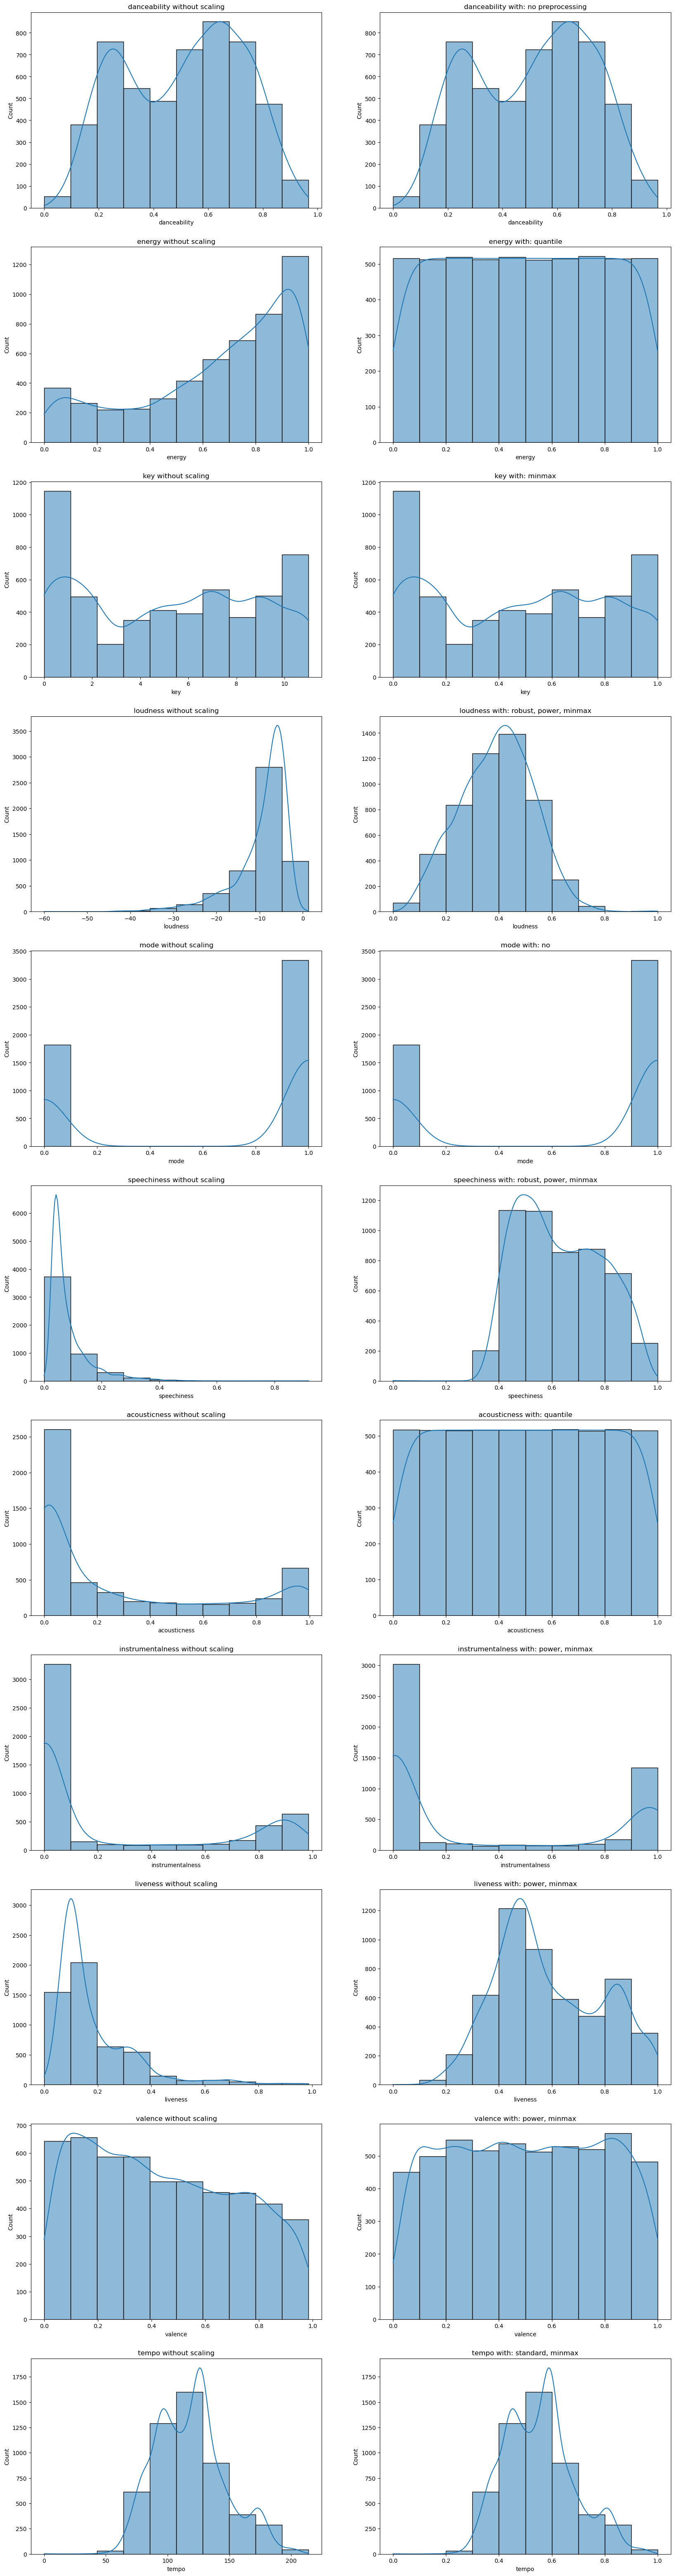

In [279]:
fig, ax = plt.subplots(11, 2, figsize=(20, 80))

for i in range(ax.shape[0]):
    sns.histplot(data=songs5000_df.iloc[:, i], bins=10, kde=True, ax=ax[i, 0]);
    sns.histplot(data=songs5000_preprocessed_df.iloc[:, i], bins=10, kde=True, ax=ax[i, 1]);

    ax[i, 0].set_title(f'{list(preprocessing_dict.keys())[i]} without scaling')
    ax[i, 1].set_title(f'{list(preprocessing_dict.keys())[i]} with: {''', '''.join(preprocessing_dict[list(preprocessing_dict.keys())[i]])}')
    
plt.show()

## 4.2 PCA

In [280]:
songs5000_pca = PCA()
songs5000_pca_df = songs5000_pca.fit_transform(songs5000_preprocessed_df)
# songs5000_pca_df

In [281]:
print('Explained variance by pricipal component:\n', songs5000_pca.explained_variance_ratio_)
print('\nCummulative explained variance by principal component\n', np.cumsum(songs5000_pca.explained_variance_ratio_))

Explained variance by pricipal component:
 [0.59381897 0.21575501 0.05030333 0.04861634 0.03418759 0.02154608
 0.01168948 0.00818934 0.00449249 0.00384466 0.00326175 0.00321585
 0.00107912]

Cummulative explained variance by principal component
 [0.59381897 0.80957398 0.85987731 0.90849365 0.94268125 0.96422732
 0.9759168  0.98410613 0.98859862 0.99244328 0.99570503 0.99892088
 1.        ]


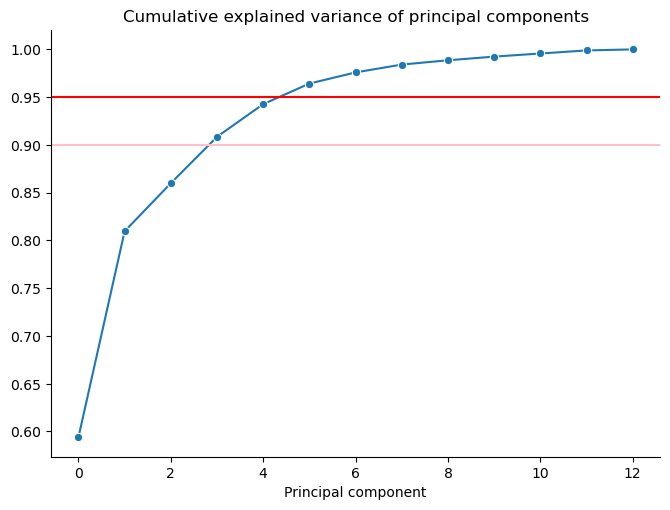

In [282]:
(
  sns.relplot(
      kind = "line",
      x = range(len(songs5000_pca.explained_variance_ratio_)),
      y = np.cumsum(songs5000_pca.explained_variance_ratio_),
      marker = "o",
      aspect = 1.4,
  )
  .set(title = "Cumulative explained variance of principal components")
  .set_axis_labels("Principal component")
);
# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95, color = 'red');
plt.axhline(y = 0.90, color = 'pink');

5 clusters explain 94% of the variance - it's our number
3 clusters explain 86% of the variance (and can be displayed in chart)

In [291]:
number_of_components = 5
songs5000_processed_df = songs5000_pca_df.iloc[:, 0:number_of_components].copy()

## 4.3 Number of clusters

For-loop for both inertia and silhouette score

In [292]:
# For loop with a few iterations per each "k"
# Around 0.5 seconds per 1 "k" and per 1 iteration

# Parameters
seed = 123
min_k = 40
max_k = 90
iterations_per_seed = 50
inertia_list = []
sil_scores = []

# Generate 10 random seeds
random.seed(seed)
random_seeds = [random.randint(0, 10000) for _ in range(iterations_per_seed)]

# Iterations
for k in range(min_k, max_k):
    inertia_in_iteration = []
    sil_score_in_iteration = []
    
    for rnd_seed in random_seeds:
        k_means = KMeans(n_clusters=k, n_init="auto", random_state=rnd_seed)
        k_means.fit(songs5000_processed_df)
        
        # Calculate inertia and silhouette score
        inertia_in_iteration.append(k_means.inertia_)
        labels = k_means.labels_
        sil_score = silhouette_score(songs5000_processed_df, labels)
        sil_score_in_iteration.append(sil_score)
    
    # Append averages to the final lists
    inertia_list.append(pd.Series(inertia_in_iteration).mean())
    sil_scores.append(pd.Series(sil_score_in_iteration).mean())


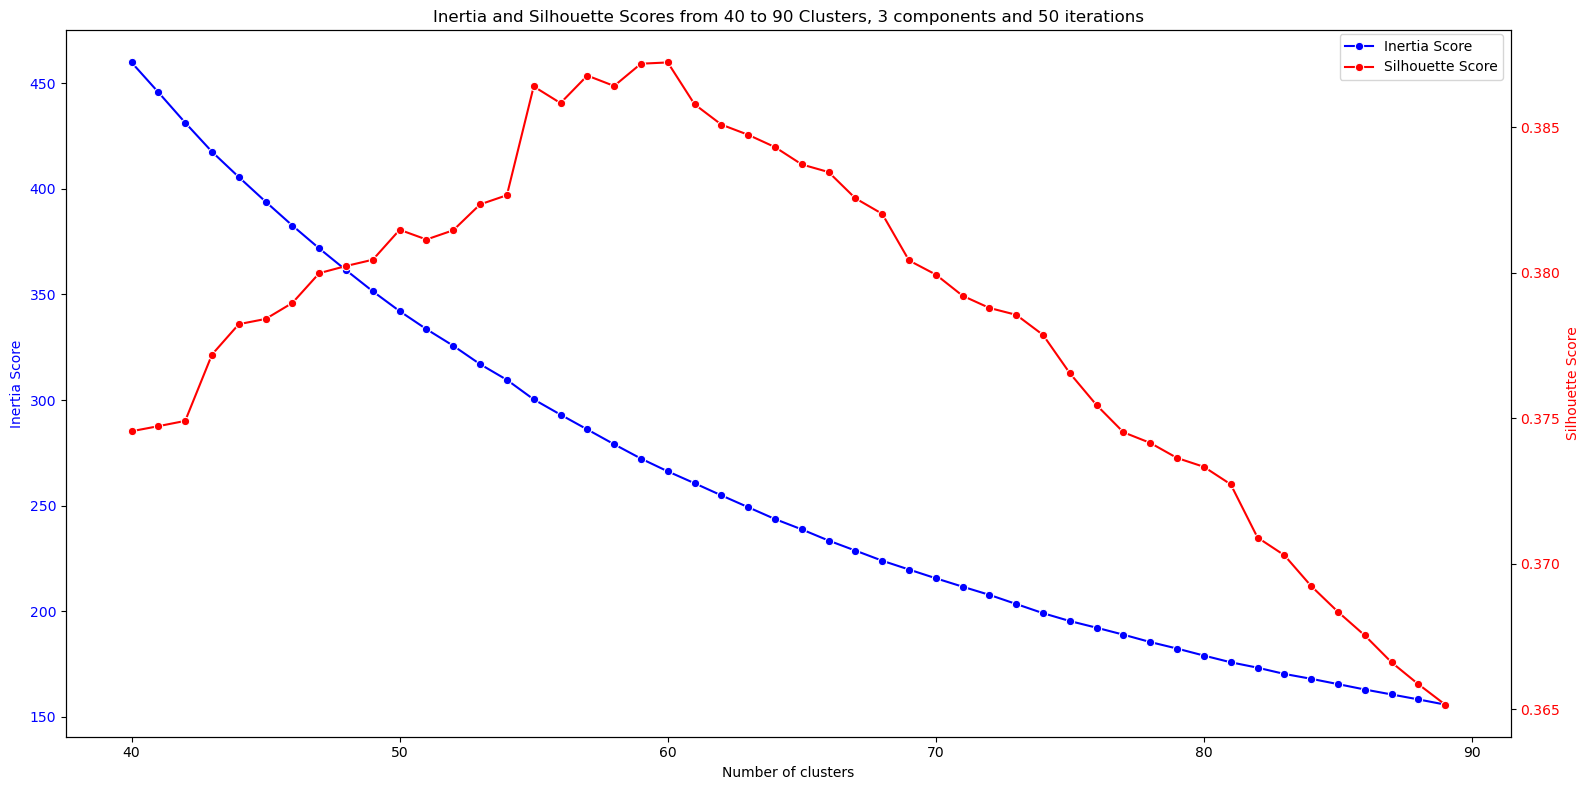

In [ ]:
# Assuming inertia_list, sil_scores, min_k, and max_k are defined
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Plot inertia scores
sns.lineplot(x=range(min_k, max_k), y=inertia_list, marker='o', ax=ax, label="Inertia Score", color='b', legend=False)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia Score", color='b')
ax.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax.twinx()
sns.lineplot(x=range(min_k, max_k), y=sil_scores, marker='o', ax=ax2, label="Silhouette Score", color='r', legend=False)
ax2.set_ylabel("Silhouette Score", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legends
ax.set_title(f"Inertia and Silhouette Scores from {min_k} to {max_k} clusters, {number_of_components} components and {iterations_per_seed} iterations")
fig.legend(loc="upper right", bbox_to_anchor=(0.947, 0.96))

# Show the plot
plt.tight_layout()
plt.show()


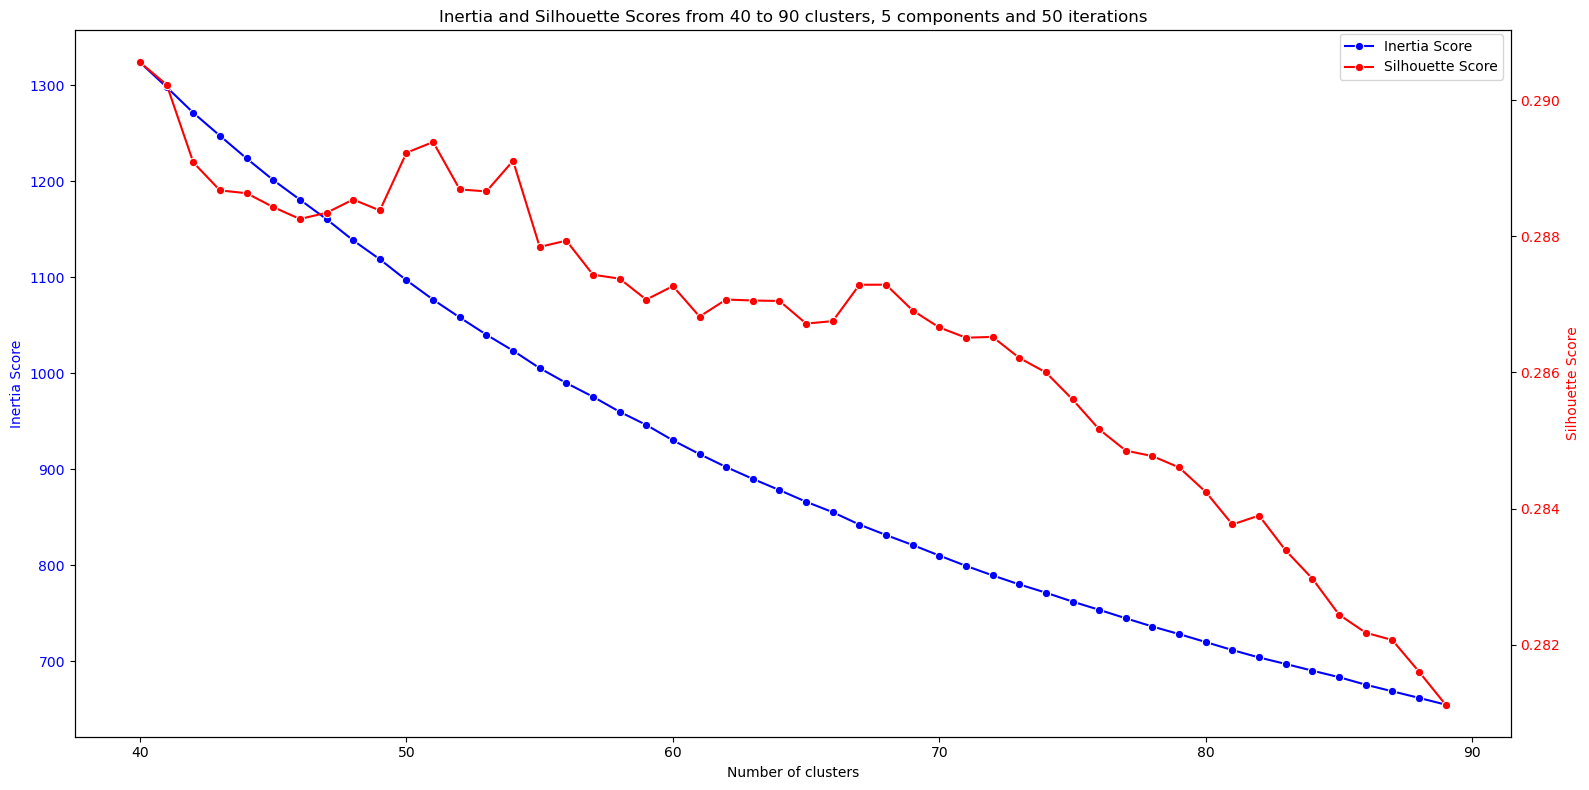

In [293]:
# Assuming inertia_list, sil_scores, min_k, and max_k are defined
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Plot inertia scores
sns.lineplot(x=range(min_k, max_k), y=inertia_list, marker='o', ax=ax, label="Inertia Score", color='b', legend=False)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia Score", color='b')
ax.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax.twinx()
sns.lineplot(x=range(min_k, max_k), y=sil_scores, marker='o', ax=ax2, label="Silhouette Score", color='r', legend=False)
ax2.set_ylabel("Silhouette Score", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legends
ax.set_title(f"Inertia and Silhouette Scores from {min_k} to {max_k} clusters, {number_of_components} components and {iterations_per_seed} iterations")
fig.legend(loc="upper right", bbox_to_anchor=(0.947, 0.96))

# Show the plot
plt.tight_layout()
plt.show()


68 looks like the right number for 5 principal components.
60 for 3.

In [294]:
number_of_kmeans = 68

## 4.4 Radar chart

In [295]:
kmeans = KMeans(n_clusters = number_of_kmeans, random_state = 123)
kmeans.fit(songs5000_processed_df)
clusters = kmeans.labels_
songs5000_processed_df["cluster"] = clusters
songs5000_processed_df

,pca0,pca1,pca2,pca3,pca4,cluster
id,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,0.083552,0.183040,0.803830,0.078908,0.328839,16
5QGM1U0eCYrQuwSJwTm5Zq,-0.718705,0.160305,-0.212203,0.592428,0.249298,30
0NLIFSZxPzQhCwnkn5PJYs,-1.215207,0.164238,-0.186210,0.594785,0.044234,35
3mXqOdlLE1k67WsAxryPFs,-0.772307,0.141506,-0.193683,0.573454,0.487276,30
7bSzjzjTkWT2CkIPPdp0eA,0.293582,0.171420,-0.161427,0.575095,0.482681,19
...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,9.111744,0.393418,-0.395653,0.176189,0.427345,8
1Gfqe7TAKklmuZf6hxsH6h,7.410632,0.341087,-0.357867,0.127578,0.428321,8
2XNwnFrdMDpismp0VUZ7cU,0.036321,-2.412976,-0.472306,-0.388106,0.764400,12


In [296]:
songs5000_processed_df.groupby(by="cluster").mean().mean()

pca0    3.156277
pca1    0.145616
pca2   -0.009229
pca3   -0.037476
pca4    0.098591
dtype: float64

In [298]:
scatter_objects = []
categories = songs5000_processed_df.drop(columns=['cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_processed_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs5000_processed_df.loc[songs5000_processed_df["cluster"] == cluster, category].mean() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_means, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of MEAN by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 50])),
  showlegend = True
)

fig.show()

Since the PCA gave so much range for pca0, we'll need to look into rescaling again.

## 4.5 Second processing

In [383]:
preprocessing2_dict.items() 

dict_items([('pca0', [{'method': 'power', 'params': {}}, {'method': 'minmax', 'params': {'feature_range': (0, 1)}}]), ('pca1', {'method': 'quantile', 'params': {}}), ('pca2', [{'method': 'power', 'params': {}}, {'method': 'minmax', 'params': {'feature_range': (0, 1)}}]), ('pca3', [{'method': 'power', 'params': {}}, {'method': 'minmax', 'params': {'feature_range': (0, 1)}}]), ('pca4', {'method': 'minmax', 'params': {'feature_range': (0, 1)}})])

In [465]:
preprocessing2_dict = {
    'pca0': [
        {'method': 'power', 'params': {}},
        {'method': 'minmax', 'params': {'feature_range': (-0.5, 1.5)}}
    ],
    'pca1': [
        {'method': 'quantile', 'params': {}}
    ],
    'pca2': [
        {'method': 'power', 'params': {}},
        {'method': 'minmax', 'params': {'feature_range': (-0.1, 1.1)}}
    ],
    'pca3': [
        {'method': 'power', 'params': {}},
        {'method': 'minmax', 'params': {'feature_range': (0, 2)}}
    ],
    'pca4': [
        {'method': 'minmax', 'params': {'feature_range': (-0.1, 1.05)}}
    ]
}
preprocessing2_df = pd.DataFrame(
    [
        (key, method.get('method'), method.get('params', {}))
        for key, methods in preprocessing2_dict.items()
        if isinstance(methods, list)
        for method in methods
        if isinstance(method, dict)
    ],
    columns=["feature", "method", "params"]
)
preprocessing2_df

,feature,method,params
0,pca0,power,{}
1,pca0,minmax,"{'feature_range': (-0.5, 1.5)}"
2,pca1,quantile,{}
3,pca2,power,{}
4,pca2,minmax,"{'feature_range': (-0.1, 1.1)}"
5,pca3,power,{}
6,pca3,minmax,"{'feature_range': (0, 2)}"
7,pca4,minmax,"{'feature_range': (-0.1, 1.05)}"


In [466]:
songs5000_processed2_df = songs5000_processed_df.copy()

for i, row in preprocessing2_df.iterrows():
    feature = row['feature']
    method = row['method']
    params = row['params']

    if method == 'minmax':
        scaler = MinMaxScaler(**params).set_output(transform="pandas")
        songs5000_processed2_df[feature] = scaler.fit_transform(songs5000_processed2_df[[feature]])
    elif method == 'standard':
        scaler = StandardScaler(**params).set_output(transform="pandas")
        songs5000_processed2_df[feature] = scaler.fit_transform(songs5000_processed2_df[[feature]])
    elif method == 'robust':
        scaler = RobustScaler(**params).set_output(transform="pandas")
        songs5000_processed2_df[feature] = scaler.fit_transform(songs5000_processed2_df[[feature]])
    elif method == 'quantile':
        transformer = QuantileTransformer(**params).set_output(transform="pandas")
        songs5000_processed2_df[feature] = transformer.fit_transform(songs5000_processed2_df[[feature]])
    elif method == 'power':
        transformer = PowerTransformer(**params).set_output(transform="pandas")
        songs5000_processed2_df[feature] = transformer.fit_transform(songs5000_processed2_df[[feature]])

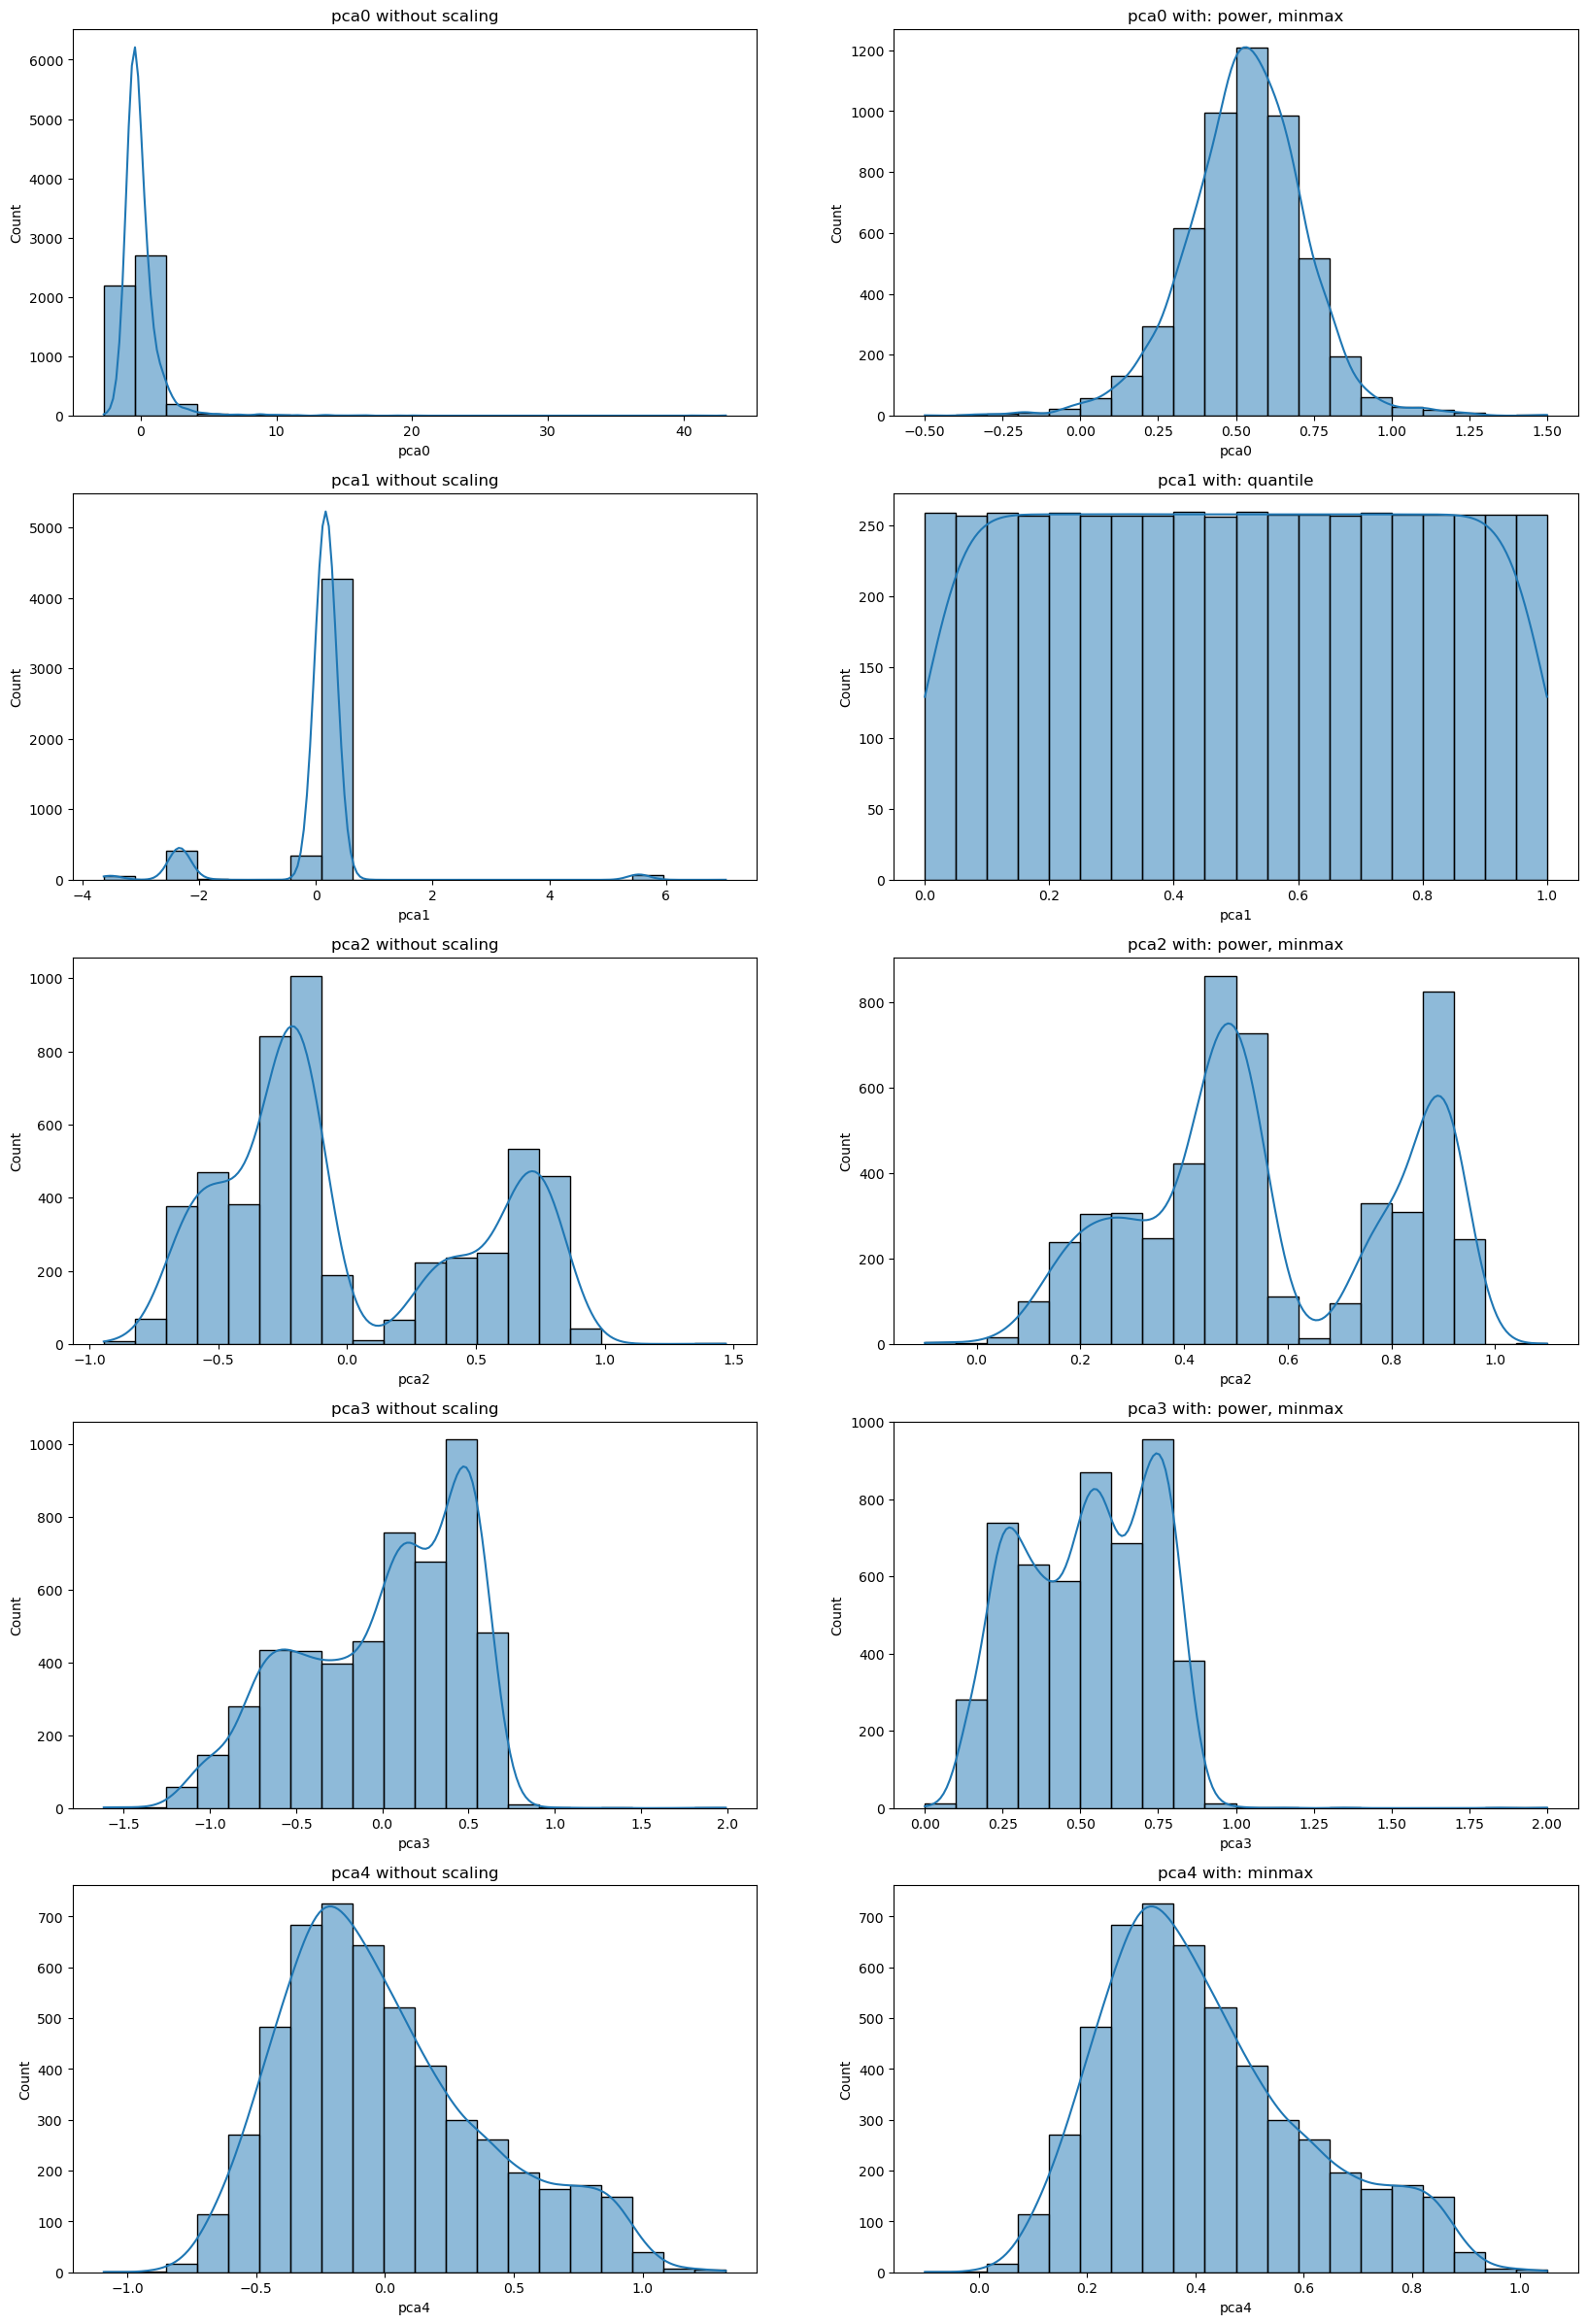

In [467]:
fig, ax = plt.subplots(number_of_components, 2, figsize=(20, 30))

for i in range(ax.shape[0]):
    sns.histplot(data=songs5000_processed_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 0]);
    sns.histplot(data=songs5000_processed2_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 1]);

    ax[i, 0].set_title(f'{list(preprocessing2_dict.keys())[i]} without scaling')
    ax[i, 1].set_title(f'{list(preprocessing2_dict.keys())[i]} with: {''', '''.join([method['method'] for method in preprocessing2_dict[list(preprocessing2_dict.keys())[i]]])}')
    
plt.show()

In [ ]:
# Outdated: no parametrization of the methods
# preprocessing2_dict = {
#     'pca0': ['power', 'minmax'],
#     'pca1': ['quantile'],
#     'pca2': ['power', 'minmax'],
#     'pca3': ['power', 'minmax'],#, 'standard', 'minmax', 'robust'],
#     'pca4': ['minmax']
# }
# preprocessing2_df = pd.DataFrame([(key, feature) for key, features in preprocessing2_dict.items() for feature in features], columns=["feature", "method"])
# preprocessing2_df

In [410]:
# Outdated: no parametrization of the methods
# songs5000_processed2_df = songs5000_processed_df.copy()
# ### Need to set MinMax for standard distribution, so that the min max are in sigma = +/- 1
# for i, row in preprocessing2_df.iterrows():
#     if row['method'] == 'minmax':
#         songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']] = (MinMaxScaler().set_output(transform="pandas").fit_transform(songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']]))
#     elif row['method'] == 'standard':
#         songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']] = (StandardScaler().set_output(transform="pandas").fit_transform(songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']]))
#     elif row['method'] == 'robust':
#         songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']] = (RobustScaler().set_output(transform="pandas").fit_transform(songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']]))
#     elif row['method'] == 'quantile':
#         songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']] = (QuantileTransformer().set_output(transform="pandas").fit_transform(songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']]))
#     elif row['method'] == 'power':
#         songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']] = (PowerTransformer().set_output(transform="pandas").fit_transform(songs5000_processed2_df[preprocessing2_df.loc[[i], 'feature']]))

In [ ]:
# Outdated: no parametrization of the methods
# fig, ax = plt.subplots(number_of_components, 2, figsize=(20, 30))

# for i in range(ax.shape[0]):
#     sns.histplot(data=songs5000_processed_df.iloc[:, i], bins=10, kde=True, ax=ax[i, 0]);
#     sns.histplot(data=songs5000_processed2_df.iloc[:, i], bins=10, kde=True, ax=ax[i, 1]);

#     ax[i, 0].set_title(f'{list(preprocessing2_dict.keys())[i]} without scaling')
#     ax[i, 1].set_title(f'{list(preprocessing2_dict.keys())[i]} with: {''', '''.join(preprocessing2_dict[list(preprocessing2_dict.keys())[i]])}')
    
# plt.show()

## 4.6 Number of clusters 2

In [504]:
# For loop with a few iterations per each "k"
# Around 0.5 seconds per 1 "k" and per 1 iteration

# Parameters
seed = 123
min_k = 55
max_k = 70
iterations_per_seed = 50
inertia_list = []
sil_scores = []

# Generate 10 random seeds
random.seed(seed)
random_seeds = [random.randint(0, 10000) for _ in range(iterations_per_seed)]

# Iterations
for k in range(min_k, max_k):
    inertia_in_iteration = []
    sil_score_in_iteration = []
    
    for rnd_seed in random_seeds:
        k_means = KMeans(n_clusters=k, n_init="auto", random_state=rnd_seed)
        k_means.fit(songs5000_processed2_df)
        
        # Calculate inertia and silhouette score
        inertia_in_iteration.append(k_means.inertia_)
        labels = k_means.labels_
        sil_score = silhouette_score(songs5000_processed2_df, labels)
        sil_score_in_iteration.append(sil_score)
    
    # Append averages to the final lists
    inertia_list.append(pd.Series(inertia_in_iteration).mean())
    sil_scores.append(pd.Series(sil_score_in_iteration).mean())


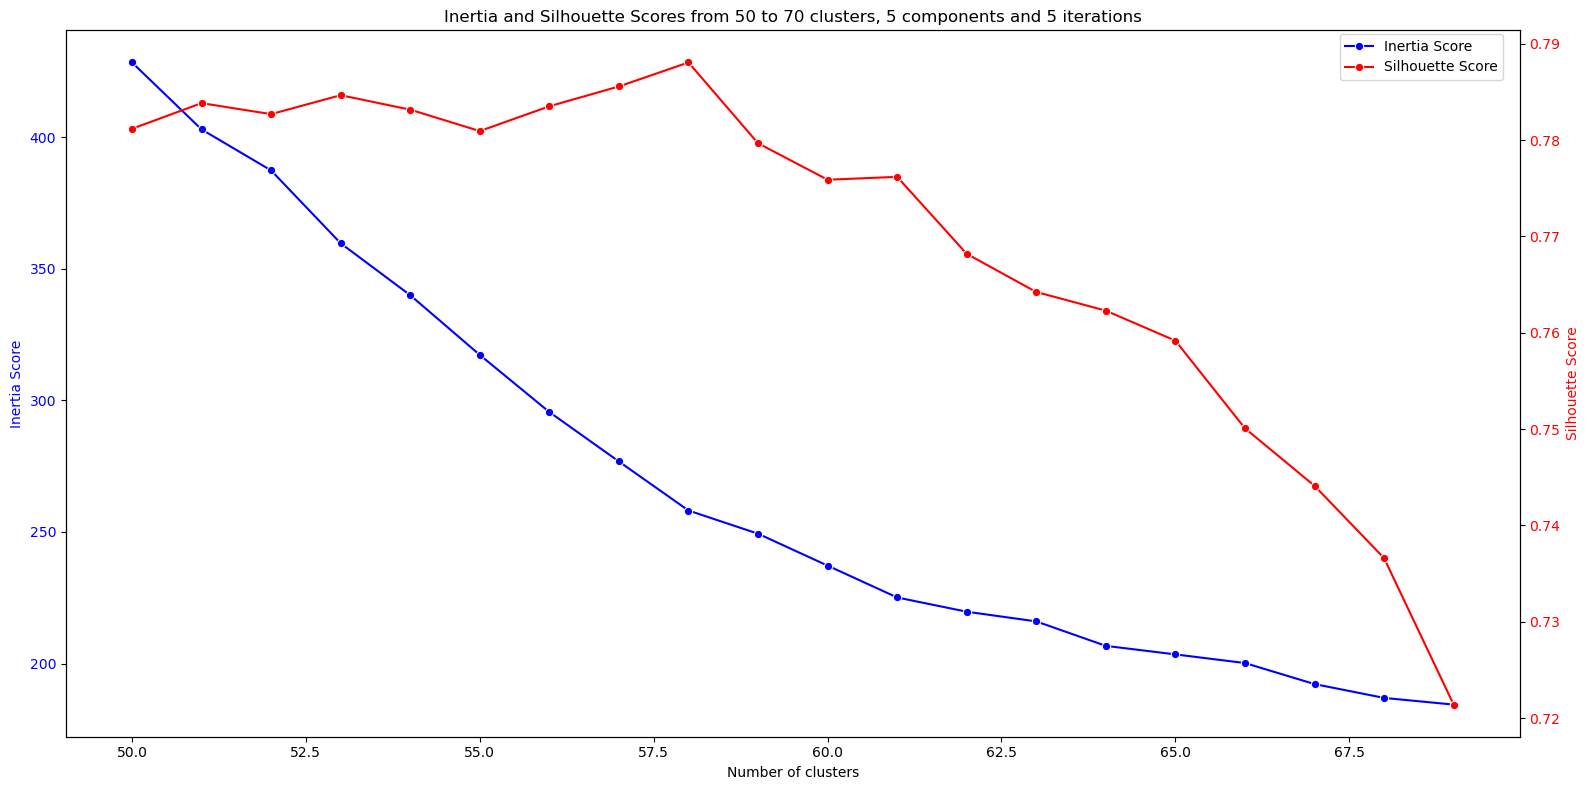

In [476]:
# Assuming inertia_list, sil_scores, min_k, and max_k are defined
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Plot inertia scores
sns.lineplot(x=range(min_k, max_k), y=inertia_list, marker='o', ax=ax, label="Inertia Score", color='b', legend=False)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia Score", color='b')
ax.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax.twinx()
sns.lineplot(x=range(min_k, max_k), y=sil_scores, marker='o', ax=ax2, label="Silhouette Score", color='r', legend=False)
ax2.set_ylabel("Silhouette Score", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legends
ax.set_title(f"Inertia and Silhouette Scores from {min_k} to {max_k} clusters, {number_of_components} components and {iterations_per_seed} iterations")
fig.legend(loc="upper right", bbox_to_anchor=(0.947, 0.96))

# Show the plot
plt.tight_layout()
plt.show()


65 for 5 principal components

84 for 3 principal components

In [505]:
number_of_kmeans2 = 65

## 4.7 k-means clustering

In [506]:
kmeans2 = KMeans(n_clusters = number_of_kmeans2, random_state = 123)
kmeans2.fit(songs5000_processed2_df)
clusters = kmeans2.labels_
songs5000_processed2_df["cluster"] = clusters
songs5000_processed2_df

,pca0,pca1,pca2,pca3,pca4,cluster
id,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,0.614691,0.650683,0.922877,0.527635,0.576583,61
5QGM1U0eCYrQuwSJwTm5Zq,0.419538,0.444938,0.481947,0.816827,0.538716,13
0NLIFSZxPzQhCwnkn5PJYs,0.247001,0.477298,0.498049,0.818345,0.441092,28
3mXqOdlLE1k67WsAxryPFs,0.402780,0.326726,0.493452,0.804663,0.652010,13
7bSzjzjTkWT2CkIPPdp0eA,0.649131,0.538527,0.513107,0.805710,0.649822,7
...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,1.103459,0.983097,0.359361,0.575886,0.623478,48
1Gfqe7TAKklmuZf6hxsH6h,1.058333,0.980722,0.385886,0.551382,0.623943,48
2XNwnFrdMDpismp0VUZ7cU,0.606136,0.019626,0.303530,0.336184,0.783939,52


In [507]:
songs5000_processed2_df.groupby(by="cluster").mean().mean()

pca0    0.591660
pca1    0.491015
pca2    0.559205
pca3    0.474065
pca4    0.477560
dtype: float64

## 4.8 Radar chart

In [508]:
scatter_objects = []
categories = songs5000_processed2_df.drop(columns=['cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_processed2_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs5000_processed2_df.loc[songs5000_processed2_df["cluster"] == cluster, category].mean() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_means, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of MEAN by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()

## 4.7 Clusters 3D plot

In [509]:
import plotly.graph_objects as go
songs5000_processed2_chart_df = songs5000_processed2_df.loc[songs5000_processed2_df['cluster'].isin(random.sample(list(songs5000_processed2_df['cluster'].values), 100))].copy()
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=songs5000_processed2_chart_df.iloc[:, 0],  # X-axis
    y=songs5000_processed2_chart_df.iloc[:, 1],  # Y-axis
    z=songs5000_processed2_chart_df.iloc[:, 2],  # Z-axis
    mode='markers',  # Show data points as markers
    marker=dict(
        color=songs5000_processed2_chart_df.loc[:, 'cluster'],  # Color by KMeans labels
        colorscale='turbo',  # Use the 'Viridis' color scale
        size=2,  # Marker size
        opacity=0.8  # Marker opacity
    )
)])

# Update layout with axis labels and title
fig.update_layout(
    title='KMeans Clustering in 3D',
    scene=dict(
        xaxis_title=songs5000_processed2_chart_df.columns[0],  # Label for X-axis
        yaxis_title=songs5000_processed2_chart_df.columns[1],  # Label for Y-axis
        zaxis_title=songs5000_processed2_chart_df.columns[2]   # Label for Z-axis
    ),
    margin=dict(l=0, r=0, b=0, t=40),  # Adjust the margins as needed
    width = 1200,
    height = 1200
)

# Show the plot
fig.show()
